# T-NER: Model Training Example
Sample notebook to finetune model on Ontonote5 dataset. Once you've done training, please take a look [model evaluation part](https://colab.research.google.com/drive/1jHVGnFN4AU8uS-ozWJIXXe2fV8HUj8NZ?usp=sharing).

More info found in the [repo](https://github.com/asahi417/tner).

In [ ]:
!pip install git+https://github.com/asahi417/tner

Cloning into '/content/drive/My Drive/Colab Notebooks/transformer-ner'...
remote: Enumerating objects: 359, done.
remote: Counting objects: 100% (359/359), done.
remote: Compressing objects: 100% (262/262), done.
remote: Total 359 (delta 216), reused 233 (delta 91), pack-reused 0
Receiving objects: 100% (359/359), 48.10 MiB | 22.27 MiB/s, done.
Resolving deltas: 100% (216/216), done.


## Model training


In [ ]:
from tner import TrainTransformerNER

In [ ]:
trainer = TrainTransformerNER(
        dataset='ontonote5',
        transformer='xlm-roberta-base',
        random_seed=1234,
        lr=1e-5,
        total_step=13000,
        warmup_step=700,
        weight_decay=1e-7,
        batch_size=16,
        batch_size_validation=2,
        max_seq_length=128,
        fp16=False,
        max_grad_norm=1.0
    )

2020-10-24 18:34:47,758 root         INFO     *** initialize network ***
2020-10-24 18:34:47,766 root         INFO     issue new checkpoint id
2020-10-24 18:34:48,229 root         INFO     checkpoint: ./ckpt/ontonote5_6bb4fdb286b5e32c068262c2a413639e
2020-10-24 18:34:48,230 root         INFO      - [arg] dataset: ontonote5
2020-10-24 18:34:48,233 root         INFO      - [arg] transformer: xlm-roberta-base
2020-10-24 18:34:48,237 root         INFO      - [arg] random_seed: 1234
2020-10-24 18:34:48,237 root         INFO      - [arg] lr: 1e-05
2020-10-24 18:34:48,238 root         INFO      - [arg] total_step: 13000
2020-10-24 18:34:48,238 root         INFO      - [arg] warmup_step: 700
2020-10-24 18:34:48,240 root         INFO      - [arg] weight_decay: 1e-07
2020-10-24 18:34:48,240 root         INFO      - [arg] batch_size: 16
2020-10-24 18:34:48,241 root         INFO      - [arg] max_seq_length: 128
2020-10-24 18:34:48,242 root         INFO      - [arg] early_stop: None
2020-10-24 18:3

In [ ]:
trainer.train()

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1944: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1374: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,
2020-10-24 18:35:38,993 root         INFO     data_loader: ['train', 'valid']
2020-10-24 18:35:38,995 root         INFO     *** start training from step 0, epoch 0 ***
/content/drive/My Drive/Colab Notebooks/transformers-ner/src/model.py:2

## Check the result
Once you trained a model, checkpoint would be created which consists of files such as model weight, tensorboard, log, label dictionary, hyperparameters.

In [ ]:
%ls ./ckpt/ontonote5_6bb4fdb286b5e32c068262c2a413639e

events.out.tfevents.1603564505.8cf37564e732.372.0  model.pt
label_to_id.json                                   parameter.json
logger_train.log


In [ ]:
%cat ./ckpt/ontonote5_6bb4fdb286b5e32c068262c2a413639e/parameter.json

{"dataset": "ontonote5", "transformer": "xlm-roberta-base", "random_seed": 1234, "lr": 1e-05, "total_step": 13000, "warmup_step": 700, "weight_decay": 1e-07, "batch_size": 16, "max_seq_length": 128, "early_stop": null, "fp16": false, "max_grad_norm": 1.0}

In [ ]:
%cat ./ckpt/ontonote5_6bb4fdb286b5e32c068262c2a413639e/label_to_id.json

{"O": 0, "B-cardinal number": 1, "B-date": 2, "I-date": 3, "B-person": 4, "I-person": 5, "B-group": 6, "B-geopolitical area": 7, "I-geopolitical area": 8, "B-law": 9, "I-law": 10, "B-organization": 11, "I-organization": 12, "B-percent": 13, "I-percent": 14, "B-ordinal number": 15, "B-money": 16, "I-money": 17, "B-work of art": 18, "I-work of art": 19, "B-facility": 20, "B-time": 21, "I-cardinal number": 22, "B-location": 23, "B-quantity": 24, "I-quantity": 25, "I-group": 26, "I-location": 27, "B-product": 28, "I-time": 29, "B-event": 30, "I-event": 31, "I-facility": 32, "B-language": 33, "I-product": 34, "I-ordinal number": 35, "I-language": 36}

***Tensorboard Visualization***
```
tensorboard --logdir=./ckpt/ontonote5_6bb4fdb286b5e32c068262c2a413639e
```

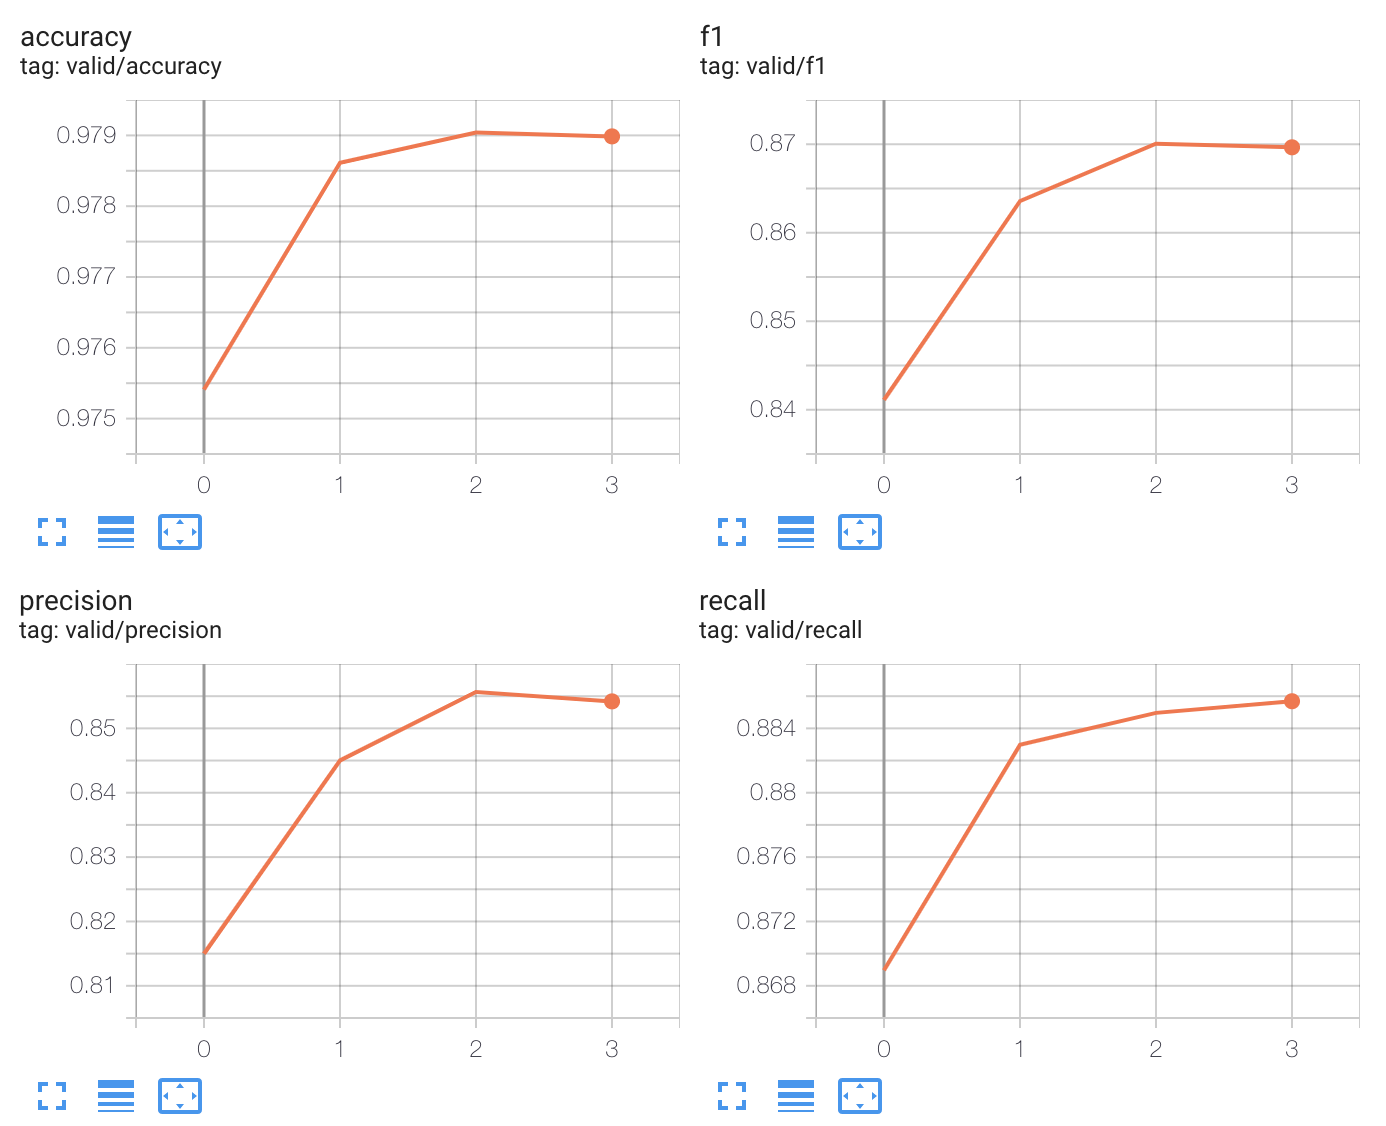